# Compare Classifiers

In this code demo we want to get a general impression how the choice of one of the classifier we learnt about
influences the classification results. Every classification method we encountered in the lecture can be used for
the case of more than two target class labels except the logistic regression. However, softmax regression is a
direct generalization of logistic regression to that setting, so we use that.
For the Naive Bayes classifier, we use Gaussian likelihoods in the following.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

In [2]:
cassini = pd.read_csv('cassini.csv',usecols=['x.1','x.2','classes'])
spirals = pd.read_csv('spirals.csv',usecols=['x.1','x.2','classes'])
simplex = pd.read_csv('simplex.csv',usecols=['x.1','x.2','classes'])

In [3]:
cassini.classes.unique()

array([1, 2, 3])

In [4]:
cassini.classes.replace({1:0,2:1,3:2},inplace=True)
spirals.classes.replace({1:0,2:1,3:2},inplace=True)
simplex.classes.replace({1:0,2:1,3:2},inplace=True)

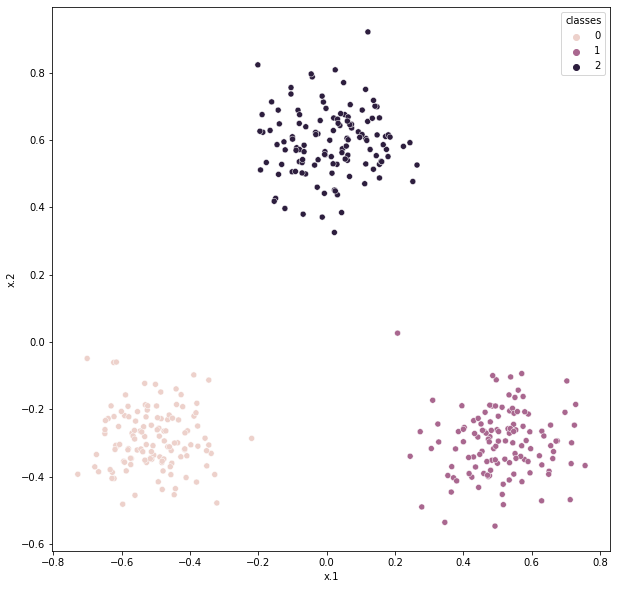

In [5]:
sns.scatterplot(x='x.1',y='x.2',hue='classes',data=simplex);

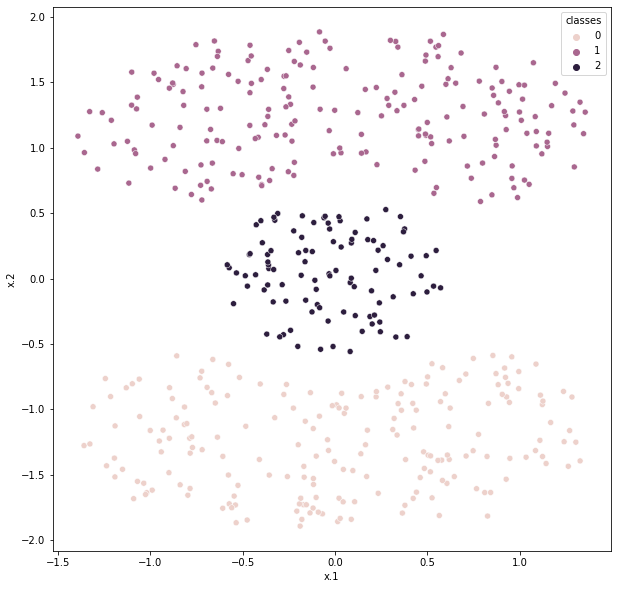

In [6]:
sns.scatterplot(x='x.1',y='x.2',hue='classes',data=cassini);

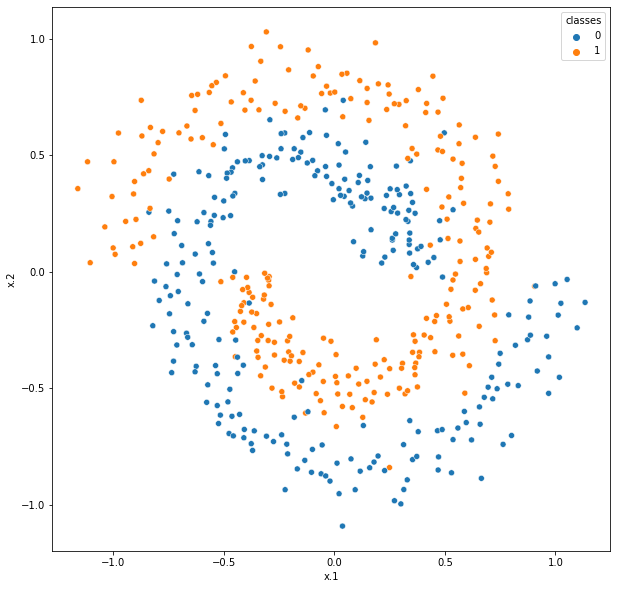

In [7]:
sns.scatterplot(x='x.1',y='x.2',hue='classes',data=spirals);

For classifiers we use scikit-learn modules

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

from utils import plot_decision_boundaries

In [9]:
names = ["Nearest Neighbors", 
#          "Linear SVM", "RBF SVM", 
         "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes", 
         "LDA","QDA"]

classifiers = [
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

h=0.02 # mesh size

## Simplex Dataset

In [10]:
y = simplex['classes'].values
X = simplex.drop('classes',axis=1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [11]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

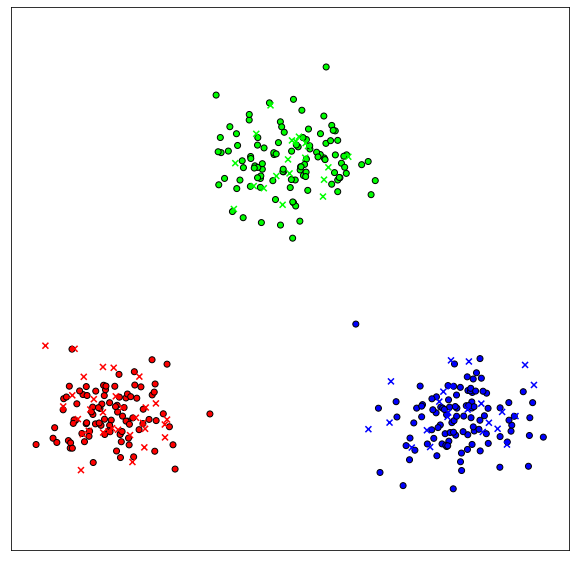

In [12]:
fig, ax = plt.subplots();
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='x',
               edgecolors='k')
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(());

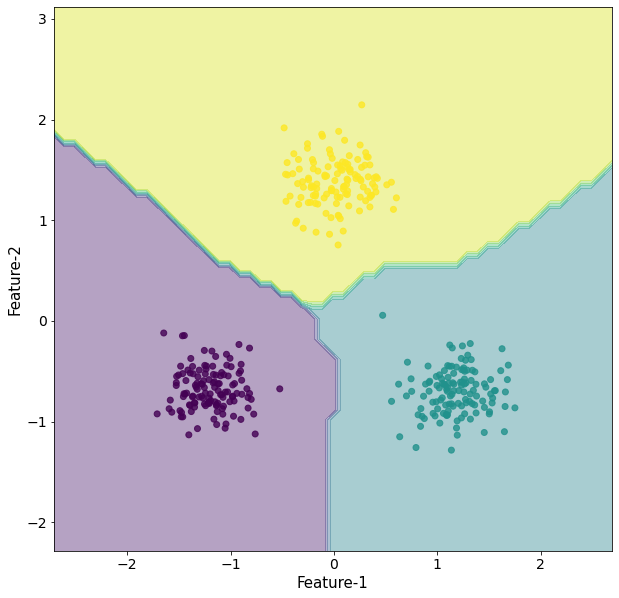

In [13]:
plot_decision_boundaries(X,y,KNeighborsClassifier,n_neighbors=1);

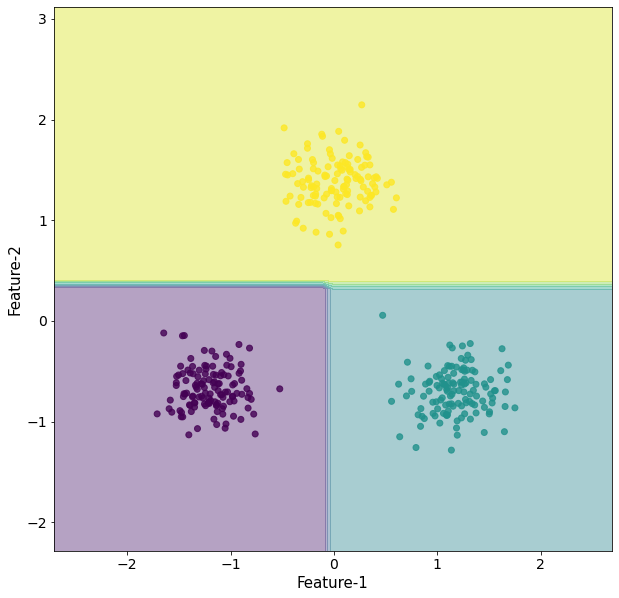

In [14]:
plot_decision_boundaries(X,y,DecisionTreeClassifier,max_depth=5);

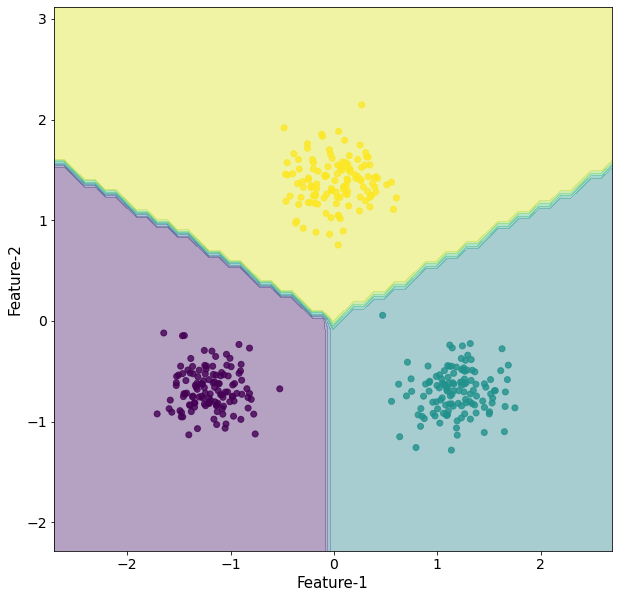

In [15]:
plot_decision_boundaries(X,y,LogisticRegression);

## Cassini Dataset

In [16]:
y = cassini['classes'].values
X = cassini.drop('classes',axis=1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=42)

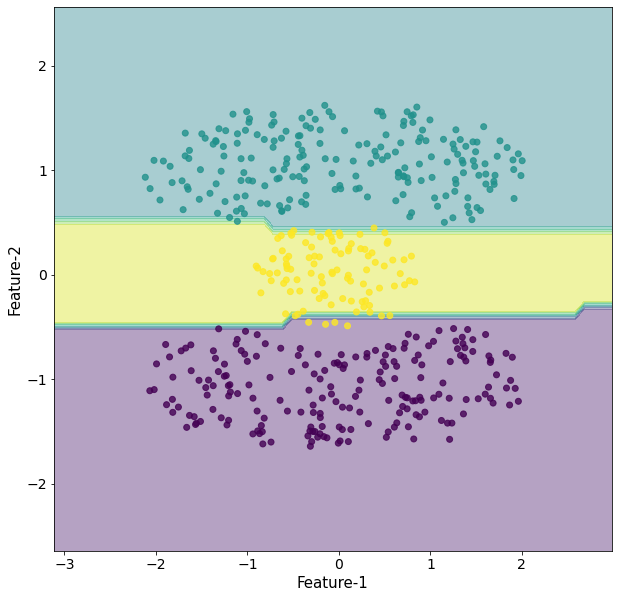

In [17]:
plot_decision_boundaries(X,y,LogisticRegression);

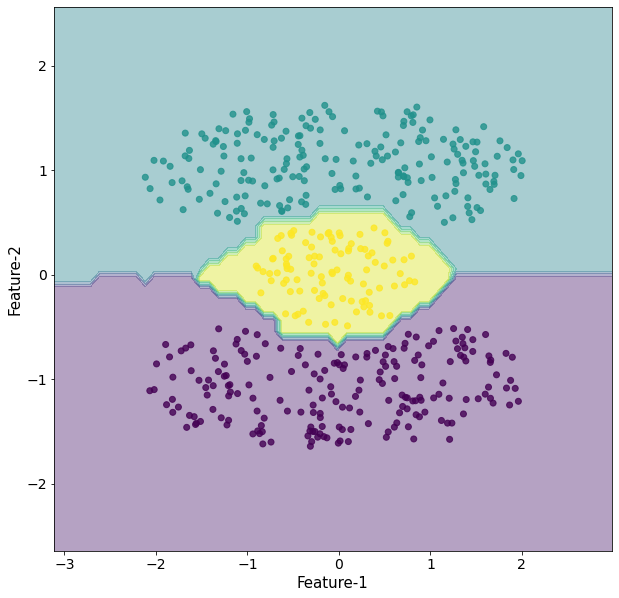

In [18]:
plot_decision_boundaries(X,y,KNeighborsClassifier,n_neighbors=3);

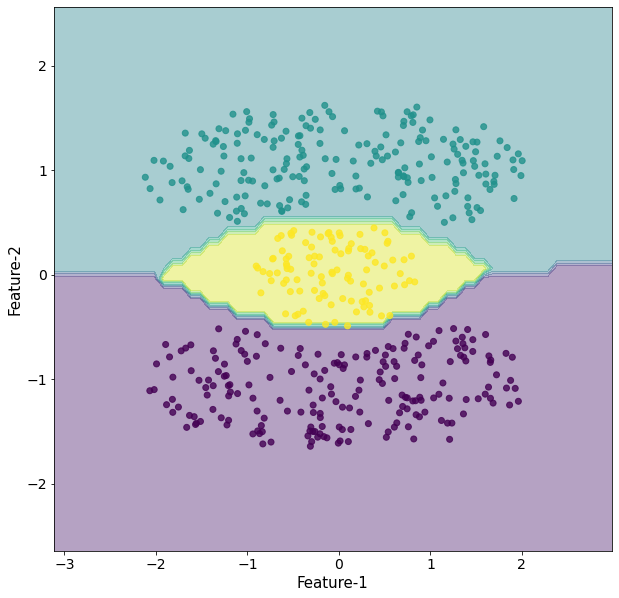

In [19]:
plot_decision_boundaries(X,y,QuadraticDiscriminantAnalysis);

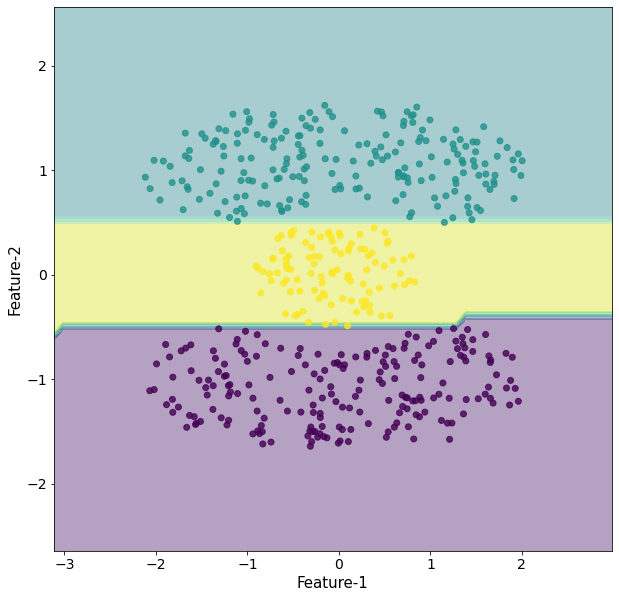

In [20]:
plot_decision_boundaries(X,y,LinearDiscriminantAnalysis);

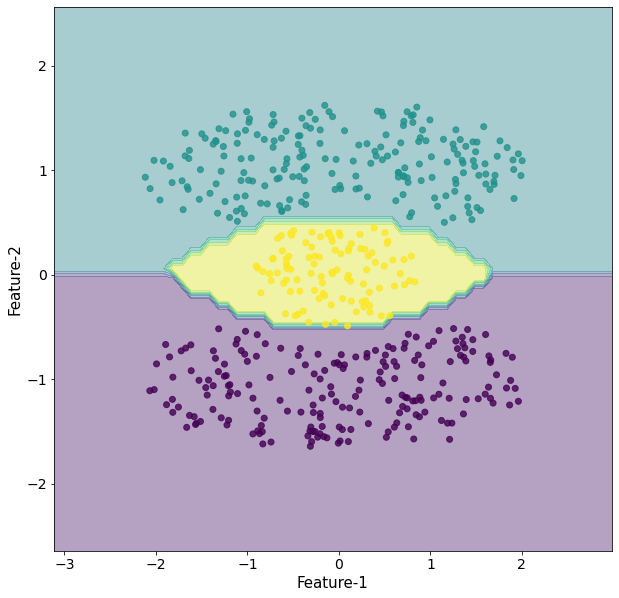

In [21]:
plot_decision_boundaries(X,y,GaussianNB);

## Spirals Dataset

In [22]:
y = spirals['classes'].values
X = spirals.drop('classes',axis=1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=42)

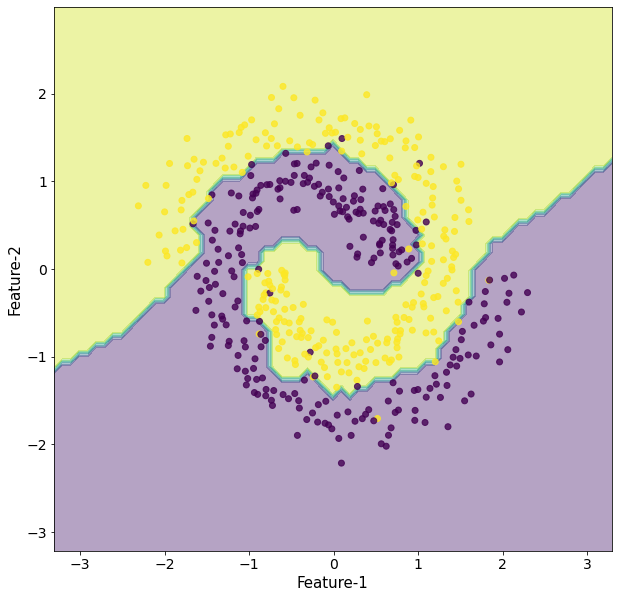

In [23]:
plot_decision_boundaries(X,y,KNeighborsClassifier,n_neighbors=3);

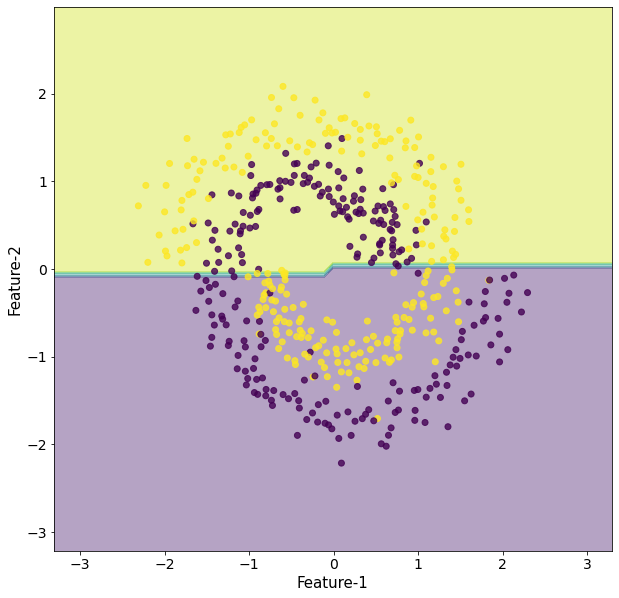

In [24]:
plot_decision_boundaries(X,y,GaussianNB);

The final data set shows that many methods we talked about so far encounter problems with data sets in
which the class boundaries are highly nonlinear, such as these spirals. Only the k-NN classifier is able to
reconstruct the appropriate spiral shape of the decision boundaries. The other methods yield mean
missclassification rates of around 50 percent.

But can’t we do better with the methods we learnt? Yes, we can do the following:
- We can use the splines idea from **splines code demo** to transform our features into higher dimensional features and try to find better decision hyperplanes in this higher dimensional space, which often works. (In fact, if it is high-dimensional “enough”, we can always find linear decision boundaries in that larger space that separate the classes perfectly. For many methods, we do not even need to explicitly compute these higher dimensional feature vectors in order to estimate the decision boundaries, this is called the kernel trick.)
- We can use kernel density estimations for the Bayes classifier, which we learnt in the **generative classifier code demo**: